In [92]:
import json
import os
import bracketManipulations as bm
import matplotlib.pyplot as plt
import pandas as pd


In [93]:
def upsetsCalc(year, strVector, regions):
    vector = bm.stringToVector(strVector)
    firstRoundList = bm.bracketToSeeds(vector)[0]
    firstRoundRegions = []
    for x in range (0, len(firstRoundList), 16):
        region = []
        for y in range (0, 16):
            region.append(firstRoundList[x+y])
        firstRoundRegions.append(region)

    secondRoundList = bm.bracketToSeeds(vector)[1]
    secondRoundRegions = []
    for x in range (0, len(secondRoundList), 8):
        region = []
        for y in range (0, 8):
            region.append(secondRoundList[x+y])
        secondRoundRegions.append(region)

    thirdRoundList = bm.bracketToSeeds(vector)[2]
    thirdRoundRegions = []
    for x in range (0, len(thirdRoundList), 4):
        region = []
        for y in range (0, 4):
            region.append(thirdRoundList[x+y])
        thirdRoundRegions.append(region)

    fourthRoundList = bm.bracketToSeeds(vector)[3]
    fourthRoundRegions = []
    for x in range (0, len(fourthRoundList), 2):
        region = []
        for y in range (0, 2):
            region.append(fourthRoundList[x+y])
        fourthRoundRegions.append(region)

    fifthRoundList = bm.bracketToSeeds(vector)[4]
    fifthRoundRegions = []
    for x in range (0, len(fifthRoundList), 1):
        region = []
        for y in range (0, 1):
            region.append(fifthRoundList[x+y])
        fifthRoundRegions.append(region)

    #upsetsList = [0, 0, 0, 0]
    upsetsList = {'Year': year, regions[0]: 0, regions[1]: 0, regions[2]: 0, regions[3]: 0}
    #Python tuples are immutable so using a dictionary or map may be better.

    for i in range (0, len(firstRoundRegions)):
        numUpsetsForRegion = 0

        firstRoundRegion = firstRoundRegions[i]
        secondRoundRegion = secondRoundRegions[i]

        pairs = list(zip(firstRoundRegion[::2], firstRoundRegion[1::2]))

        for j in range (0, len(secondRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (secondRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        #upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(secondRoundRegions)):
        numUpsetsForRegion = 0

        secondRoundRegion = secondRoundRegions[i]
        thirdRoundRegion = thirdRoundRegions[i]

        pairs = list(zip(secondRoundRegion[::2], secondRoundRegion[1::2]))

        for j in range (0, len(thirdRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (thirdRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(thirdRoundRegions)):
        numUpsetsForRegion = 0

        thirdRoundRegion = thirdRoundRegions[i]
        fourthRoundRegion = fourthRoundRegions[i]

        pairs = list(zip(thirdRoundRegion[::2], thirdRoundRegion[1::2]))

        for j in range (0, len(fourthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fourthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(fourthRoundRegions)):
        numUpsetsForRegion = 0

        fourthRoundRegion = fourthRoundRegions[i]
        fifthRoundRegion = fifthRoundRegions[i]

        pairs = list(zip(fourthRoundRegion[::2], fourthRoundRegion[1::2]))

        for j in range (0, len(fifthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fifthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += 1
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion
    return upsetsList

In [94]:
brackets = []
with open ('allBracketsTTT.json') as jsonFile:
    data = json.load(jsonFile)
    for bracketDict in data['brackets']:
        bracket = bracketDict['bracket']
        year = bracket['year']
        vector = bracket['fullvector']
        regionOrder = []
        for region in bracketDict['bracket']['regions']:
            regionOrder.append(region['name'])
        brackets.append((year, vector, regionOrder))
        
for bracket in brackets:
    print (bracket)

('1985', '100101111101111111111111000101101101111110100111001110110101000', ['West', 'East', 'Midwest', 'Southeast'])
('1986', '111101011110110111111110000100110110111101101101110111111111011', ['Southeast', 'West', 'East', 'Midwest'])
('1987', '100111111110101111011011101101101010111110110101111011110100001', ['West', 'Midwest', 'Southeast', 'East'])
('1988', '101110111011010111001111010100111111011100101111111111110111101', ['Midwest', 'East', 'West', 'Southeast'])
('1989', '101101011000101101001111100010101100111110100100101111000010001', ['Midwest', 'Southeast', 'East', 'West'])
('1990', '101110111010011110101111111111101111111101110110111010011001011', ['Southeast', 'West', 'East', 'Midwest'])
('1991', '111101011000111111100111010000100011001101101111111111000110001', ['West', 'Midwest', 'East', 'Southeast'])
('1992', '101111110011011101110011010110101111011000101110011111100100010', ['Midwest', 'Southeast', 'East', 'West'])
('1993', '1111011111011111000111011011011111111110101011

In [95]:
upsetsList = []

for tupl in brackets:
    upsetsList.append(upsetsCalc(tupl[0], tupl[1], tupl[2]))
    
for upsetList in upsetsList:
    print (upsetList)

{'Year': '1985', 'West': 5, 'East': 0, 'Midwest': 5, 'Southeast': 6}
{'Year': '1986', 'Southeast': 6, 'West': 2, 'East': 5, 'Midwest': 4}
{'Year': '1987', 'West': 4, 'Midwest': 4, 'Southeast': 5, 'East': 5}
{'Year': '1988', 'Midwest': 5, 'East': 5, 'West': 2, 'Southeast': 3}
{'Year': '1989', 'Midwest': 3, 'Southeast': 5, 'East': 5, 'West': 5}
{'Year': '1990', 'Southeast': 4, 'West': 6, 'East': 4, 'Midwest': 6}
{'Year': '1991', 'West': 3, 'Midwest': 3, 'East': 6, 'Southeast': 2}
{'Year': '1992', 'Midwest': 4, 'Southeast': 5, 'East': 2, 'West': 3}
{'Year': '1993', 'Southeast': 3, 'West': 5, 'East': 1, 'Midwest': 3}
{'Year': '1994', 'West': 3, 'Midwest': 5, 'East': 7, 'Southeast': 3}
{'Year': '1995', 'Midwest': 3, 'Southeast': 4, 'East': 5, 'West': 2}
{'Year': '1996', 'Southeast': 5, 'West': 4, 'East': 3, 'Midwest': 3}
{'Year': '1997', 'West': 1, 'Midwest': 2, 'East': 5, 'Southeast': 6}
{'Year': '1998', 'East': 2, 'West': 4, 'Midwest': 7, 'South': 4}
{'Year': '1999', 'East': 6, 'Midwest':

In [96]:
df = pd.DataFrame(upsetsList)
print (df)

    Year  West  East  Midwest  Southeast  South  Southwest
0   1985     5     0      5.0        6.0    NaN        NaN
1   1986     2     5      4.0        6.0    NaN        NaN
2   1987     4     5      4.0        5.0    NaN        NaN
3   1988     2     5      5.0        3.0    NaN        NaN
4   1989     5     5      3.0        5.0    NaN        NaN
5   1990     6     4      6.0        4.0    NaN        NaN
6   1991     3     6      3.0        2.0    NaN        NaN
7   1992     3     2      4.0        5.0    NaN        NaN
8   1993     5     1      3.0        3.0    NaN        NaN
9   1994     3     7      5.0        3.0    NaN        NaN
10  1995     2     5      3.0        4.0    NaN        NaN
11  1996     4     3      3.0        5.0    NaN        NaN
12  1997     1     5      2.0        6.0    NaN        NaN
13  1998     4     2      7.0        NaN    4.0        NaN
14  1999     6     6      5.0        NaN    6.0        NaN
15  2000     6     6      1.0        NaN    6.0        N

In [97]:
worstRegions = df.max(axis=1).tolist()
bestRegions = df.min(axis=1).tolist()

print (worstRegions)
print ()
print (bestRegions)

[6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 7.0, 5.0, 5.0, 6.0, 7.0, 6.0, 6.0, 7.0, 5.0, 5.0, 5.0, 5.0, 6.0, 4.0, 6.0, 6.0, 7.0, 9.0, 7.0, 8.0, 7.0, 5.0, 7.0, 5.0, 9.0, 5.0]

[0.0, 2.0, 4.0, 2.0, 3.0, 4.0, 2.0, 2.0, 1.0, 3.0, 2.0, 3.0, 1.0, 2.0, 5.0, 1.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 3.0, 4.0]


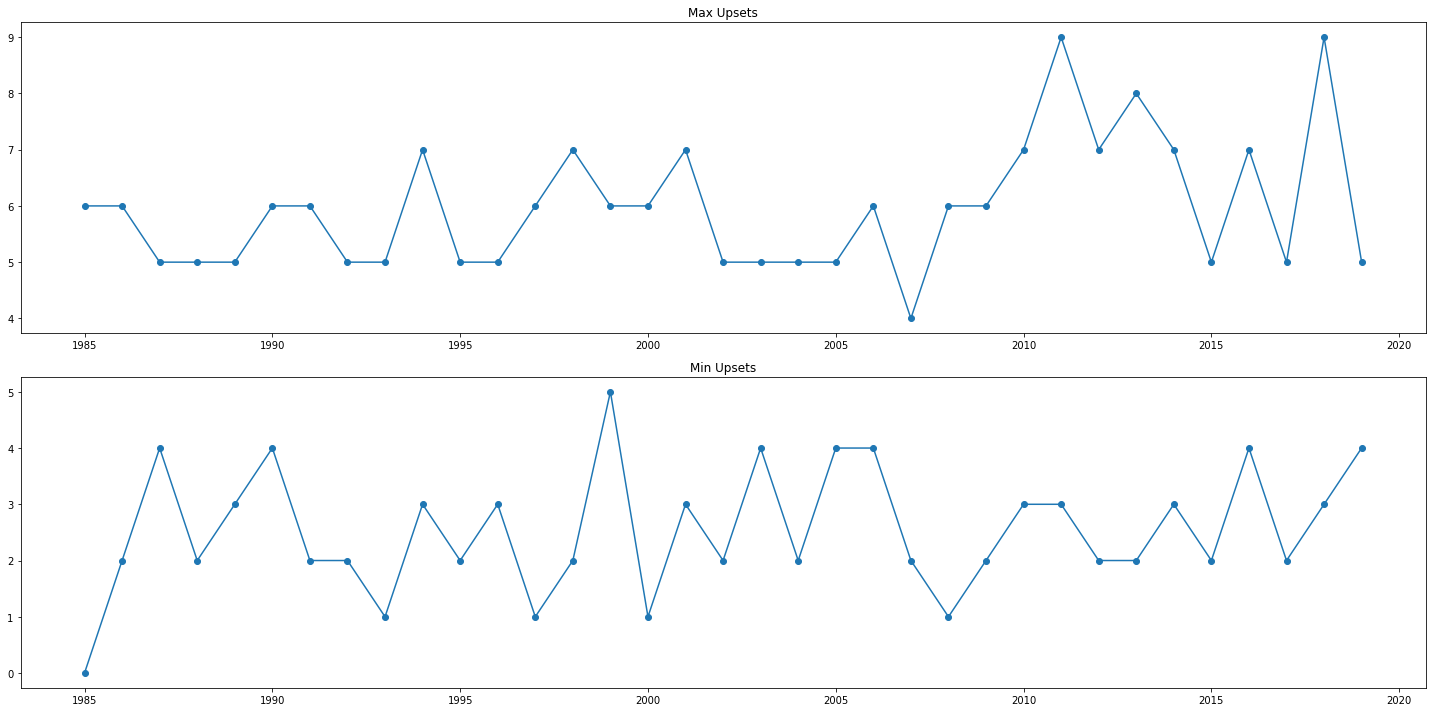

In [98]:
years = []
for year in range(1985, 2020):
    years.append(year)

fig, axs = plt.subplots(2)

axs[0].scatter(years, worstRegions)
axs[0].plot(years, worstRegions)
axs[0].set_title("Max Upsets")
axs[1].scatter(years, bestRegions)
axs[1].plot(years, bestRegions)
axs[1].set_title("Min Upsets")

fig.tight_layout()
plt.show()

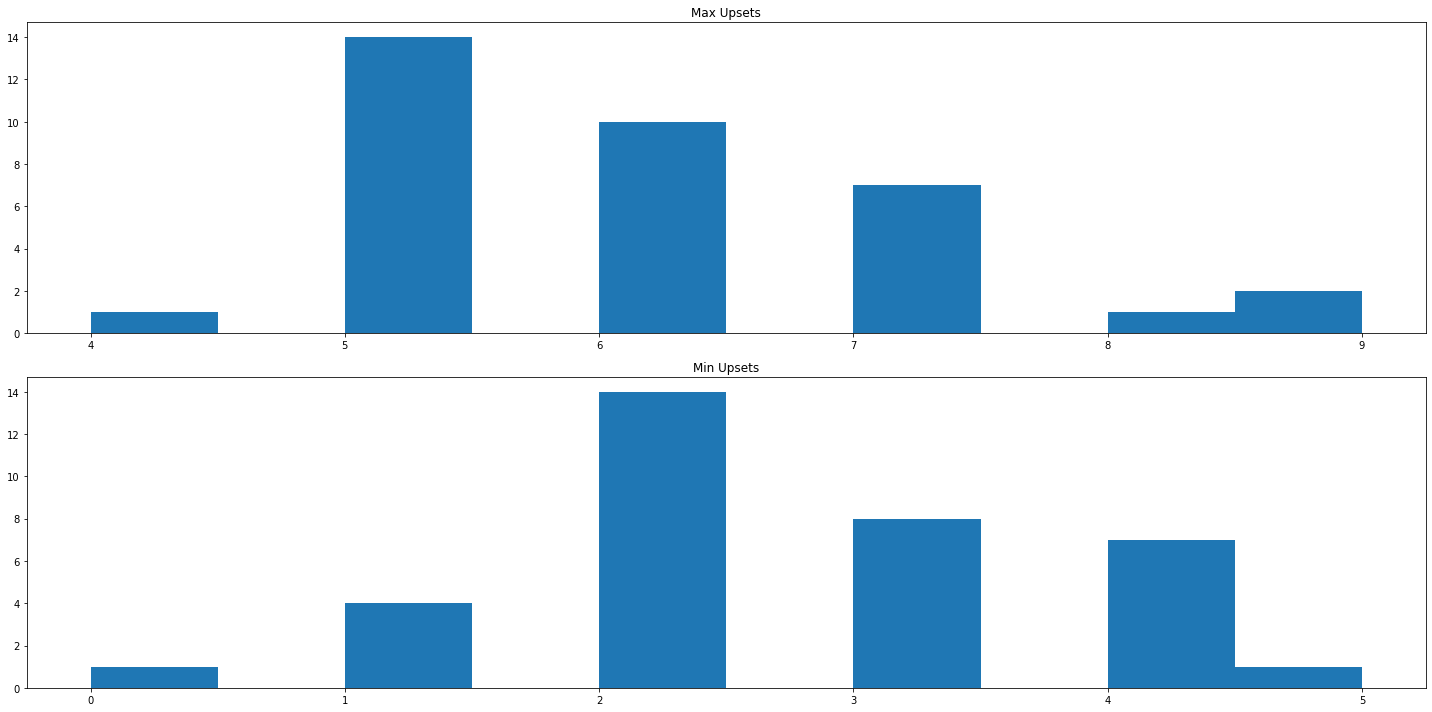

In [99]:
fig, axs = plt.subplots(2)

axs[0].hist(worstRegions)
axs[0].set_title("Max Upsets")
axs[1].hist(bestRegions)
axs[1].set_title("Min Upsets")

fig.tight_layout()
plt.show()

In [100]:
def upsetsWeightedCalc(year, strVector, regions):
    vector = bm.stringToVector(strVector)
    firstRoundList = bm.bracketToSeeds(vector)[0]
    firstRoundRegions = []
    for x in range (0, len(firstRoundList), 16):
        region = []
        for y in range (0, 16):
            region.append(firstRoundList[x+y])
        firstRoundRegions.append(region)

    secondRoundList = bm.bracketToSeeds(vector)[1]
    secondRoundRegions = []
    for x in range (0, len(secondRoundList), 8):
        region = []
        for y in range (0, 8):
            region.append(secondRoundList[x+y])
        secondRoundRegions.append(region)

    thirdRoundList = bm.bracketToSeeds(vector)[2]
    thirdRoundRegions = []
    for x in range (0, len(thirdRoundList), 4):
        region = []
        for y in range (0, 4):
            region.append(thirdRoundList[x+y])
        thirdRoundRegions.append(region)

    fourthRoundList = bm.bracketToSeeds(vector)[3]
    fourthRoundRegions = []
    for x in range (0, len(fourthRoundList), 2):
        region = []
        for y in range (0, 2):
            region.append(fourthRoundList[x+y])
        fourthRoundRegions.append(region)

    fifthRoundList = bm.bracketToSeeds(vector)[4]
    fifthRoundRegions = []
    for x in range (0, len(fifthRoundList), 1):
        region = []
        for y in range (0, 1):
            region.append(fifthRoundList[x+y])
        fifthRoundRegions.append(region)

    #upsetsList = [0, 0, 0, 0]
    upsetsList = {'Year': year, regions[0]: 0, regions[1]: 0, regions[2]: 0, regions[3]: 0}
    #Python tuples are immutable so using a dictionary or map may be better.

    for i in range (0, len(firstRoundRegions)):
        numUpsetsForRegion = 0

        firstRoundRegion = firstRoundRegions[i]
        secondRoundRegion = secondRoundRegions[i]

        pairs = list(zip(firstRoundRegion[::2], firstRoundRegion[1::2]))

        for j in range (0, len(secondRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (secondRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += secondRoundRegion[j] - min(seedOne, seedTwo)
        
        #upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(secondRoundRegions)):
        numUpsetsForRegion = 0

        secondRoundRegion = secondRoundRegions[i]
        thirdRoundRegion = thirdRoundRegions[i]

        pairs = list(zip(secondRoundRegion[::2], secondRoundRegion[1::2]))

        for j in range (0, len(thirdRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (thirdRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += thirdRoundRegion[j] - max(seedOne, seedTwo)
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(thirdRoundRegions)):
        numUpsetsForRegion = 0

        thirdRoundRegion = thirdRoundRegions[i]
        fourthRoundRegion = fourthRoundRegions[i]

        pairs = list(zip(thirdRoundRegion[::2], thirdRoundRegion[1::2]))

        for j in range (0, len(fourthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fourthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += fourthRoundRegion[j] - min(seedOne, seedTwo)
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion

    for i in range (0, len(fourthRoundRegions)):
        numUpsetsForRegion = 0

        fourthRoundRegion = fourthRoundRegions[i]
        fifthRoundRegion = fifthRoundRegions[i]

        pairs = list(zip(fourthRoundRegion[::2], fourthRoundRegion[1::2]))

        for j in range (0, len(fifthRoundRegion)):
            tupl = pairs[j]
            seedOne = tupl[0]
            seedTwo = tupl[1]
            if (fifthRoundRegion[j] == max(seedOne, seedTwo)):
                numUpsetsForRegion += fifthRoundRegion[j] - min(seedOne, seedTwo)
        
        # upsetsList[i] += numUpsetsForRegion
        upsetsList[regions[i]] += numUpsetsForRegion
    return upsetsList

In [101]:
filePath = 'allBracketsTTT.json'

brackets = []
with open (filePath) as jsonFile:
    data = json.load(jsonFile)
    for bracketDict in data['brackets']:
        bracket = bracketDict['bracket']
        year = bracket['year']
        vector = bracket['fullvector']
        regionOrder = []
        for region in bracketDict['bracket']['regions']:
            regionOrder.append(region['name'])
        brackets.append((year, vector, regionOrder))

upsetsList = []

for tupl in brackets:
    upsetsList.append(upsetsWeightedCalc(tupl[0], tupl[1], tupl[2]))

df = pd.DataFrame(upsetsList)
print (df)

    Year  West  East  Midwest  Southeast  South  Southwest
0   1985    13     0      7.0       23.0    NaN        NaN
1   1986     4    18     12.0       27.0    NaN        NaN
2   1987     8     5     19.0       30.0    NaN        NaN
3   1988     3    15     17.0        4.0    NaN        NaN
4   1989    17    18      9.0       20.0    NaN        NaN
5   1990    16     3     14.0       19.0    NaN        NaN
6   1991     9    40     19.0        3.0    NaN        NaN
7   1992    17     4      1.0       24.0    NaN        NaN
8   1993    34     0      2.0        5.0    NaN        NaN
9   1994     9    14     11.0        2.0    NaN        NaN
10  1995     5    20     10.0       22.0    NaN        NaN
11  1996    12     8      4.0       22.0    NaN        NaN
12  1997     0    17      1.0       24.0    NaN        NaN
13  1998     6    16     25.0        NaN    4.0        NaN
14  1999    19    11     13.0        NaN   16.0        NaN
15  2000     9    14      0.0        NaN    6.0        N

In [102]:
worstRegions = df.max(axis=1).tolist()
bestRegions = df.min(axis=1).tolist()

print (worstRegions)
print ()
print (bestRegions)

[23.0, 27.0, 30.0, 17.0, 20.0, 19.0, 40.0, 24.0, 34.0, 14.0, 22.0, 22.0, 24.0, 25.0, 19.0, 14.0, 33.0, 23.0, 13.0, 11.0, 17.0, 26.0, 6.0, 31.0, 26.0, 19.0, 36.0, 28.0, 38.0, 26.0, 16.0, 38.0, 14.0, 40.0, 21.0]

[0.0, 4.0, 5.0, 3.0, 9.0, 3.0, 3.0, 1.0, 0.0, 2.0, 5.0, 4.0, 0.0, 4.0, 11.0, 0.0, 5.0, 7.0, 2.0, 3.0, 4.0, 14.0, 1.0, 0.0, 5.0, 8.0, 5.0, 1.0, 7.0, 8.0, 0.0, 12.0, 8.0, 5.0, 12.0]


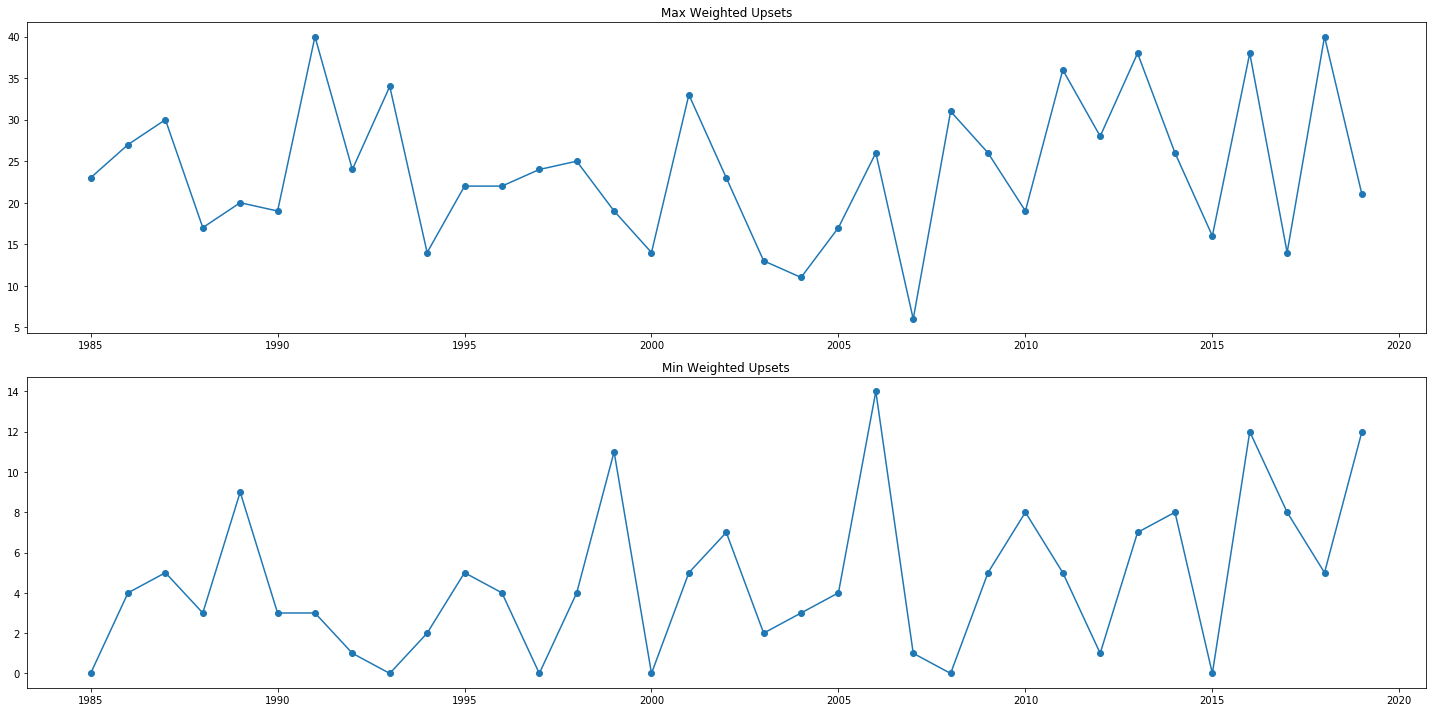

In [103]:
years = []
for year in range(1985, 2020):
    years.append(year)

fig, axs = plt.subplots(2)

axs[0].scatter(years, worstRegions)
axs[0].plot(years, worstRegions)
axs[0].set_title("Max Weighted Upsets")
axs[1].scatter(years, bestRegions)
axs[1].plot(years, bestRegions)
axs[1].set_title("Min Weighted Upsets")

fig.tight_layout()
plt.show()

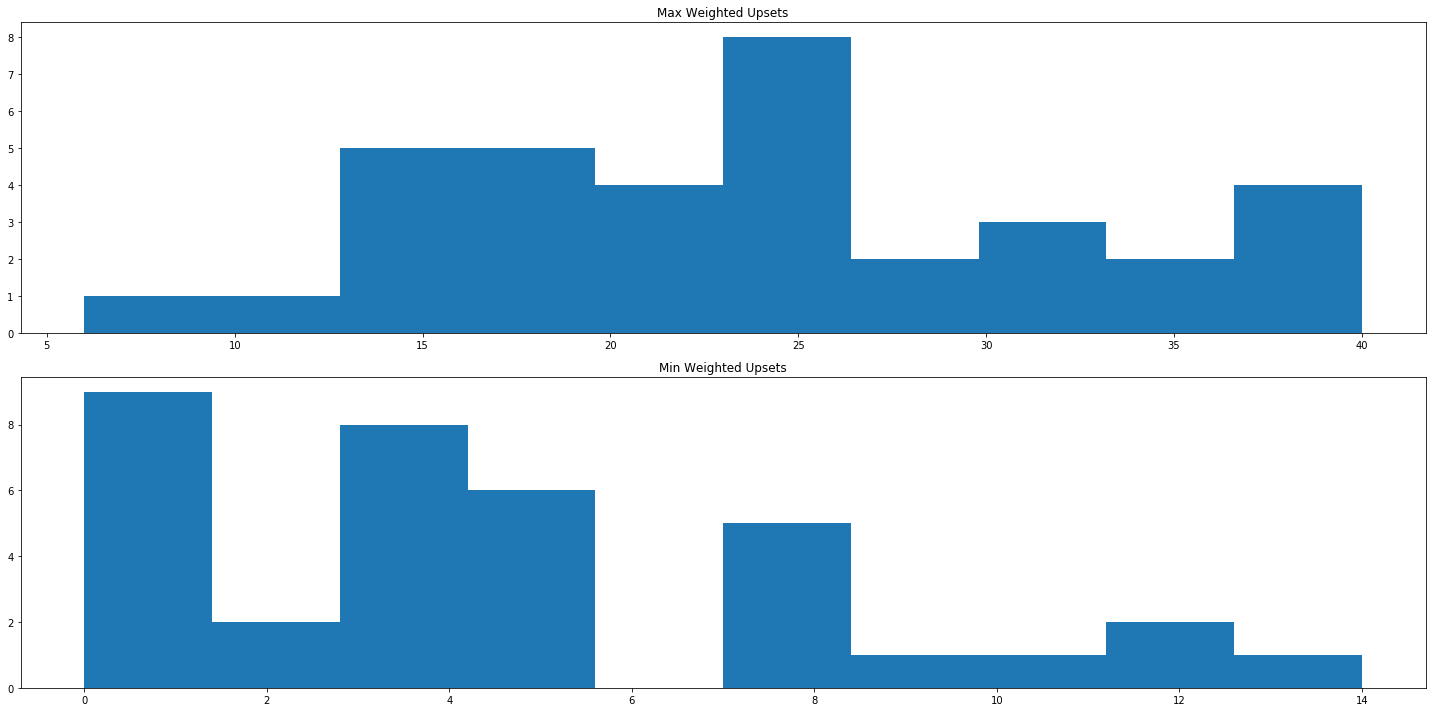

In [104]:
fig, axs = plt.subplots(2)

axs[0].hist(worstRegions)
axs[0].set_title("Max Weighted Upsets")
axs[1].hist(bestRegions)
axs[1].set_title("Min Weighted Upsets")

fig.tight_layout()
plt.show()